In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv(r"C:\fires_utf8.csv")
size = pd.read_csv(r"C:\us_size.csv", sep = ',')

C:\Users\33767\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (8,10,11,12,13,14,15,16,17,18,35,37) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Modification des noms d'états par leur abréviations sur le df 'size'

In [2]:
size = size.replace({
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
})

In [3]:
size.columns = ['STATE', 'STATE_AREA']

### Nettoyage de la bdd

In [4]:
df.drop(['Shape','FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID', 'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT', 'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID', 'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME', 'COMPLEX_NAME'], axis = 1, inplace = True)

### Ajout des tailles d'états dans le df 

In [5]:
df = df.groupby(['STATE']).sum()

In [6]:
df_new = df.join(size.set_index('STATE'), on='STATE')

In [7]:
df_new.head()

,OBJECTID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,LATITUDE,LONGITUDE,OWNER_CODE,FIPS_CODE,STATE_AREA
STATE,,,,,,,,,,,,,,,
AK,10082406848,25727739,3.150260e+10,2174064,8505314.0,65585,2.133541e+10,1603957.0,7979298.0,3.223309e+07,8.087091e+05,-1.915751e+06,113331,54898.0,656425
AL,77454402680,133338606,1.632818e+11,9962095,46791028.0,404764,7.623578e+10,4719620.0,33707937.0,9.205453e+05,2.179350e+06,-5.781334e+06,917814,2814564.0,52423
AR,29134959371,63506536,7.769449e+10,5313264,20321649.0,187562,2.494632e+10,1617250.0,15519533.0,5.089118e+05,1.100262e+06,-2.939985e+06,358655,1518278.0,53182
AZ,38165429587,143329695,1.755668e+11,13001635,96297555.0,346374,1.627348e+11,12162190.0,98555959.0,5.576681e+06,2.440451e+06,-7.969784e+06,391277,270208.0,114006
CA,177304918294,379691069,4.649442e+11,38212251,152513076.0,1078677,2.254822e+11,18713179.0,134455404.0,1.274586e+07,7.095646e+06,-2.278055e+07,2040892,3183993.0,163707


In [8]:
df_new['FIRE_SIZE'] = df_new['FIRE_SIZE'] / 640

#conversion des acres en miles carrés

In [9]:
df2 = df_new.sort_values(by = 'FIRE_SIZE', ascending=False)

### Graph comparatif

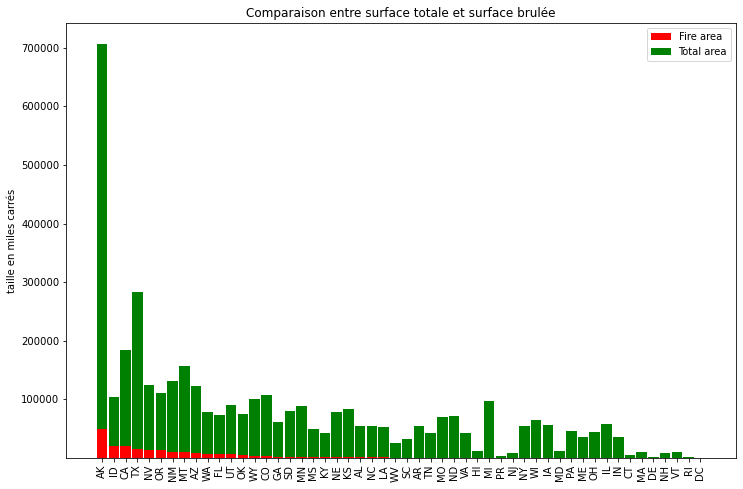

In [10]:
plt.figure(figsize = (12, 8))
plt.bar(df2.index,df2['FIRE_SIZE'],width = 0.9, color = 'r', label = 'Fire area')
plt.bar(range(len(df_new)),df2['STATE_AREA'],width = 0.9, bottom = df2['FIRE_SIZE'], color = 'g', label = 'Total area')
plt.xticks(rotation=90)
plt.title("Comparaison entre surface totale et surface brulée")
plt.ylabel('taille en miles carrés')
plt.legend();

In [18]:
df2['ratio'] = df2['FIRE_SIZE'] / df2['STATE_AREA']*100

In [15]:
df3 = df2.sort_values(by = 'ratio', ascending=False)

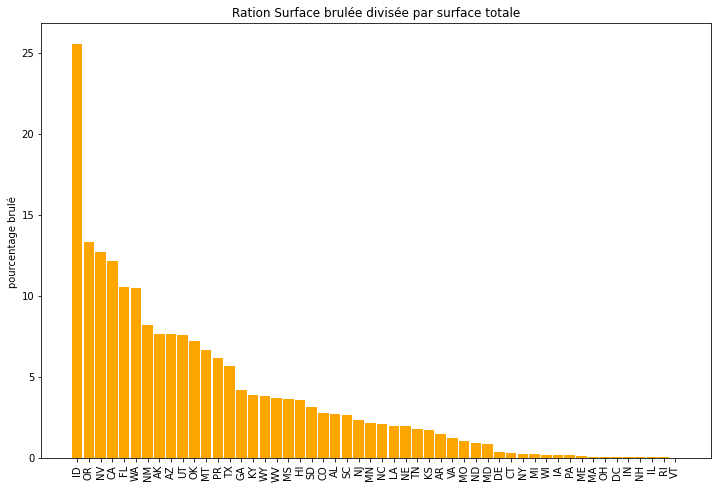

In [21]:
plt.figure(figsize = (12, 8))
plt.bar(df3.index,df3['ratio'],width = 0.9, color = 'orange')
plt.xticks(rotation=90)
plt.title('Ration Surface brulée divisée par surface totale')
plt.ylabel('pourcentage brulé ');